<a href="https://colab.research.google.com/github/chumpblocckami/colabs/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!nvidia-smi

Fri Nov 26 16:00:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Fashion MNIST

fig size 28 28


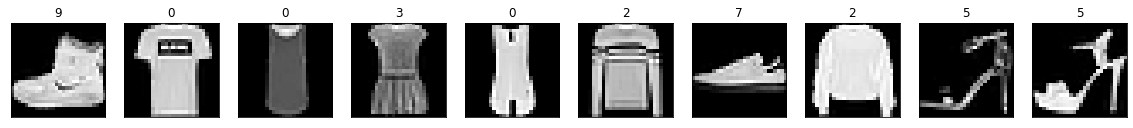

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

fig_x,fig_y = np.array(x_train)[0].shape
print("fig size", fig_x, fig_y)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## POKEMON SPRITES

In [ ]:
## DOWNLOAD POKEMON DATA
%%capture
!wget https://veekun.com/static/pokedex/downloads/generation-1.tar.gz
!mkdir dataset
!tar -xvf "generation-1.tar.gz" -C "dataset" 

In [ ]:
import requests
poke_dict = eval(requests.get("https://calmcode.io/datasets/pokemon.json").text)
first_gen = [x for x in poke_dict if "Mega" not in x["name"]]

In [ ]:
from PIL import Image
import os 

path = "dataset/pokemon/main-sprites/yellow/gray/"
figsize = (28,28)
dataset = []
for _file in os.listdir(path):
  if "png" in _file:
    img = Image.open(f"{path}/{_file}")
    img = img.resize(figsize, Image.ANTIALIAS)
    label = first_gen[int("".join(_file.split(".")[0]))-1]["type"][0]
    dataset.append((np.array(img), label))
dataset = np.asarray(dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split([x[0] for x in dataset], [x[1] for x in dataset], test_size=0.33, random_state=126)

x_train = np.array(x_train).astype('float32') / 255
x_test = np.array(x_test).astype('float32') / 255

fig_x,fig_y = np.array(x_train)[0].shape
print("fig size", fig_x, fig_y)

fig size 28 28


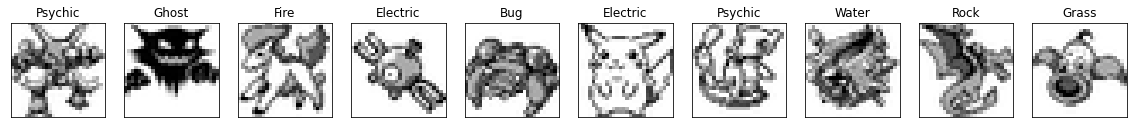

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
## ENCODER

from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, UpSampling2D,Input
from tensorflow.keras import Model 

input_img = Input(shape=(fig_x,fig_y,1))
x = Conv2D(16,(3,3),activation="relu",padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

Model(input_img, encoded).summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
## DECODER
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation="sigmoid",padding="same")(x)

Model(input_img, decoded).summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")
autoencoder.fit(x=x_train, 
                y=x_train, 
                epochs=250, 
                batch_size=8, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/250
13/13 [==============================] - 1s 39ms/step - loss: 0.4759 - val_loss: 0.4691
Epoch 2/250
13/13 [==============================] - 0s 11ms/step - loss: 0.4565 - val_loss: 0.4655
Epoch 3/250
13/13 [==============================] - 0s 10ms/step - loss: 0.4520 - val_loss: 0.4626
Epoch 4/250
13/13 [==============================] - 0s 10ms/step - loss: 0.4500 - val_loss: 0.4613
Epoch 5/250
13/13 [==============================] - 0s 10ms/step - loss: 0.4492 - val_loss: 0.4616
Epoch 6/250
13/13 [==============================] - 0s 13ms/step - loss: 0.4489 - val_loss: 0.4607
Epoch 7/250
13/13 [==============================] - 0s 14ms/step - loss: 0.4490 - val_loss: 0.4610
Epoch 8/250
13/13 [==============================] - 0s 14ms/step - loss: 0.4488 - val_loss: 0.4616
Epoch 9/250
13/13 [==============================] - 0s 14ms/step - loss: 0.4488 - val_loss: 0.4617
Epoch 10/250
13/13 [==============================] - 0s 13ms/step - loss: 0.4492 - val_loss: 0.4624

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

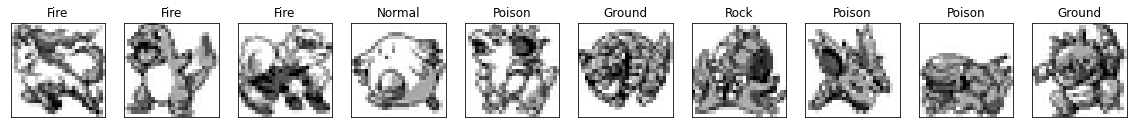

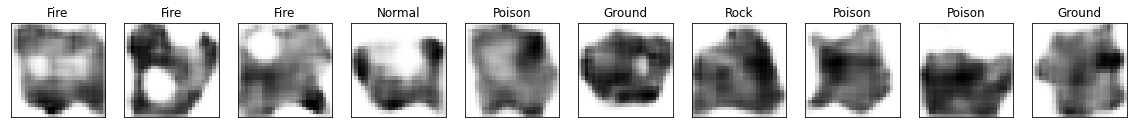

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.imshow(decoded_imgs[i][:,:,0])
  plt.title(y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from tensorflow.keras.layers import Flatten
from sklearn.manifold import TSNE
import numpy as np 

embed_layer = Flatten()(encoded)
embeddings = Model(input_img, embed_layer).predict(x_test)
tsne = TSNE(n_components=2, learning_rate="auto")
emb2d = tsne.fit_transform(embeddings)
x, y = np.squeeze(emb2d[:, 0]), np.squeeze(emb2d[:, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


No handles with labels found to put in legend.


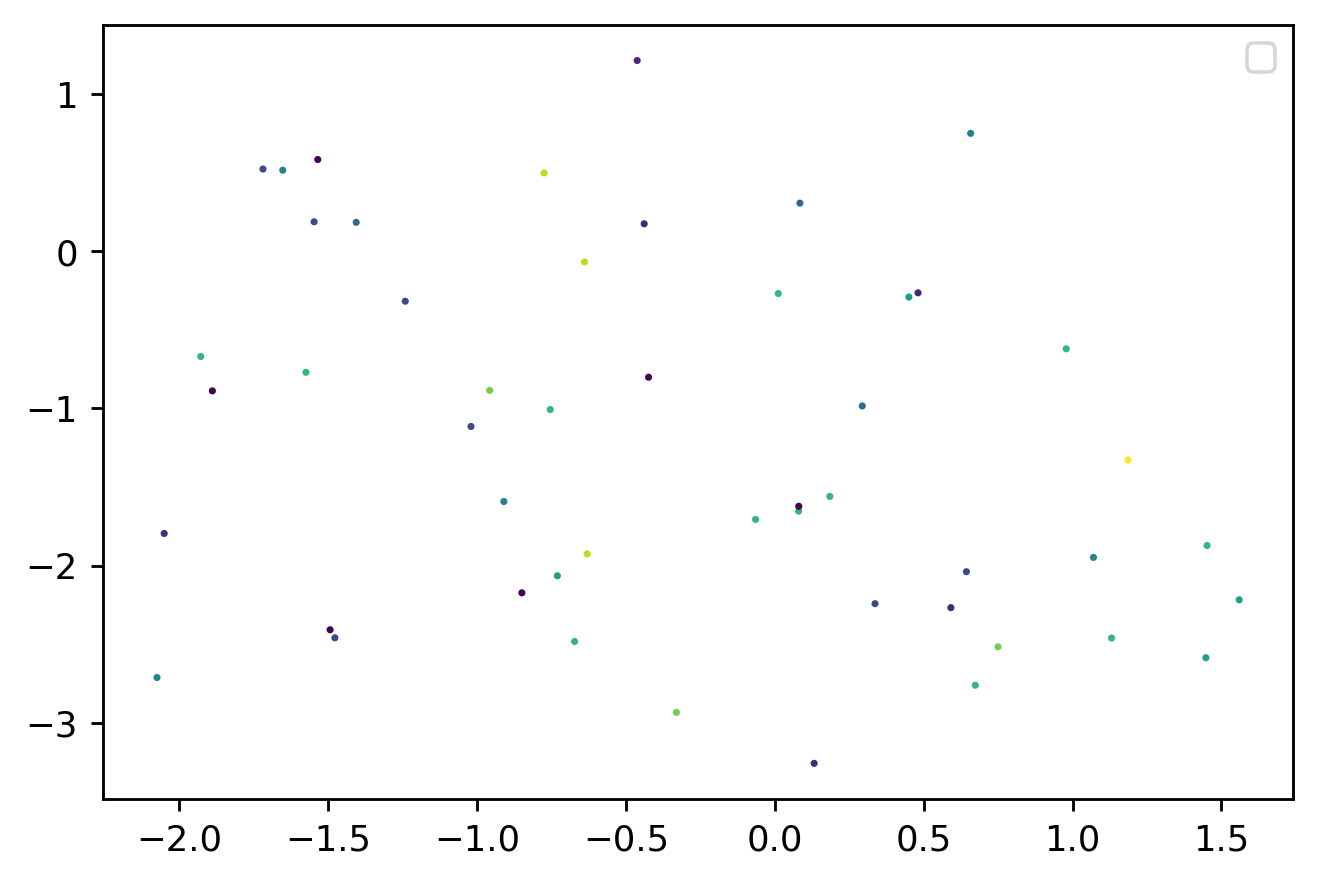

In [ ]:
#get colors if labels are not a number
to_check = y_test
try:
  int(to_check[0])
  colors = to_check[0]
except:
  colors = []
  c_value = {}
  n = 0
  for label in to_check:
    if label in c_value.keys():
      colors.append(c_value[label])
    else:
      c_value[label] = n
      n = n+1
      colors.append(c_value[label])

plt.figure(dpi=256)
plt.scatter(x,y,c=colors, cmap="viridis",s=1)
plt.legend()
plt.show()